# Demo for the ProblemsSolvers class.

This script is intended to help with debugging problems and solvers.

It create problem-solver groups (using the directory) and runs multiple macroreplications of each problem-solver pair.

## Append SimOpt Path

Since the notebook is stored in simopt/notebooks, we need to append the parent simopt directory to the system path to import the necessary modules later on.

In [1]:
import sys
from pathlib import Path

# Take the current directory, find the parent, and add it to the system path
sys.path.append(str(Path.cwd().parent))

## Configuration Parameters

This section defines the core parameters for the demo.

To query model/problem/solver names, run `python scripts/list_directories.py`

In [2]:
# Specify the names of the solver(s) and problem(s) to test.
solver_abbr_names = ["RNDSRCH", "ASTRODF", "NELDMD"]
problem_abbr_names = ["CNTNEWS-1", "SAN-1"]

num_macroreps = 3
num_postreps = 50
num_postreps_init_opt = 50

In [3]:
# Initialize an instance of the experiment class.
from simopt.experiment_base import ProblemsSolvers

mymetaexperiment = ProblemsSolvers(
    solver_names=solver_abbr_names, problem_names=problem_abbr_names
)

# Write to log file.
mymetaexperiment.log_group_experiment_results()

In [4]:
# Run a fixed number of macroreplications of each solver on each problem.
mymetaexperiment.run(n_macroreps=num_macroreps)

In [5]:
print("Post-processing results.")
# Run a fixed number of postreplications at all recommended solutions.
mymetaexperiment.post_replicate(n_postreps=num_postreps)

Post-processing results.


In [6]:
print("Post-normalizing results.")

# Find an optimal solution x* for normalization.
mymetaexperiment.post_normalize(n_postreps_init_opt=num_postreps_init_opt)

Post-normalizing results.


Plotting results...
Plot saved to [WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_12-42-06/plots/SOLVER_SET_PROBLEM_SET_profile_cdf_0.1_solve_times.png')]
Plotting complete!


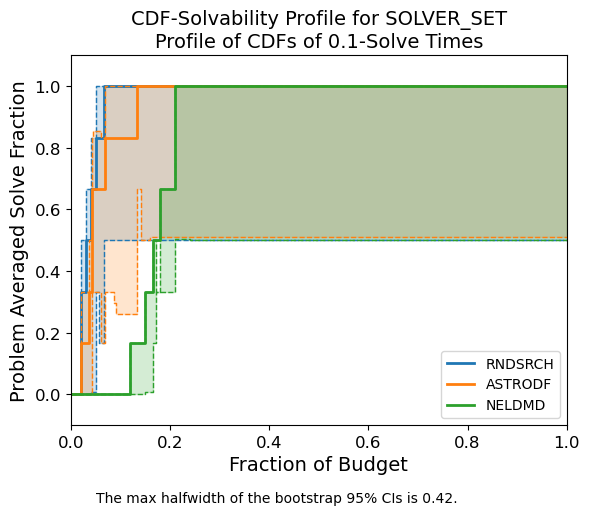

In [7]:
# Produce basic plots.

from simopt.experiment_base import PlotType, plot_solvability_profiles

print("Plotting results...")


def _print_path(plot_path: list[Path]) -> None:
    print(f"Plot saved to {plot_path!s}")


_print_path(
    plot_solvability_profiles(
        experiments=mymetaexperiment.experiments, plot_type=PlotType.CDF_SOLVABILITY
    )
)

print("Plotting complete!")